IGIHOZO_Christella 
Sujet 3: Analyse des données d’irradiance solaire du réseau IOS-net
Online access to the data : https://galilee.univ-reunion.fr/
Documentation on the siphon package (Python package to access the data on the TDS server) : https://unidata.github.io/siphon/latest/index.html

In [114]:
# !pip install pysolardb
# !pip install netCDF4 numpy matplotlib seaborn datetime

In [106]:
import sys
from datetime import datetime
from siphon.catalog import TDSCatalog

import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import numpy as np
import seaborn as sns
tds_url_base = 'https://galilee.univ-reunion.fr/thredds/'


In [72]:
# from pysolardb.SolarDB import SolarDB

# solar=SolarDB()
# # solar.register(email='igihchrist01@gmail.com')

In [107]:
from pysolardb.SolarDB import SolarDB
# solar = SolarDB()
solar.login(token="647bb56abdbbe8cfa4f6706fa8cf4175161f1000")
solar.status()
# solar.logout()



DEBUG:pysolardb.SolarDB:Successfully authenticated user
INFO:pysolardb.SolarDB:User connected


True

In [110]:
solar.getAllSites()
# print(solar.getAllSites())
solar.getAllTypes()
solar.getSensors(sites=['amitie', 'anseboileau', 'antananarivo', 'braspanonmoreau', 'cavernedufour', 'cilaosbrassec', 'cilaospiscine', 'cilaosthermes', 'craterebory', 'diego', 'durban', 'edfboisdenefles', 'edflapossession', 'edfsaintandre', 'edfsaintleu', 'edfsaintpierre', 'hahaya', 'leportbarbusse', 'leportmairie', 'mrtbrasdeau', 'observatoirevolcan', 'ouani', 'pitondesneiges', 'plaineparcnational', 'reservetortues', 'sainterosemairie', 'saintjosephmairie', 'saintlouisjeanjoly', 'saintpaulcarat', 'uomreduit', 'urbsrn', 'urmoufia', 'urtampon', 'vacoas'], sensor_types=["GHI"])
# print(solar.getSensors._doc_)

DEBUG:pysolardb.SolarDB:All data sites successfully extracted from SolarDB
DEBUG:pysolardb.SolarDB:All data types successfully extracted from SolarDB
DEBUG:pysolardb.SolarDB:All sensors successfully extracted from SolarDB


['GHI_ab01_Avg',
 'GHI_ac01_Avg',
 'GHI_pa01_Avg',
 'GHI_pa03_Avg',
 'GHI_pb01_Avg',
 'GHI_pc01_Avg',
 'GHI_pd01_Avg',
 'GHI_pd01_Max',
 'GHI_pd01_Min',
 'GHI_pd01_Std',
 'GHI_pd03_Avg',
 'GHI_pd03_Max',
 'GHI_pd03_Min',
 'GHI_pd03_Std',
 'GHI_pe01_Avg',
 'GHI_pf01_Avg',
 'GHI_pf03_Avg',
 'GHI_pf03_Max',
 'GHI_pf03_Min',
 'GHI_pf05_Avg',
 'GHI_ph01_Avg',
 'GHI_ph02_Avg',
 'GHI_pi01_Avg',
 'GHI_pi02_Avg',
 'GHI_pj01_Avg',
 'GHI_pj02_Avg',
 'GHI_pk01_Avg',
 'GHI_pk02_Avg',
 'GHI_pl01_Avg',
 'GHI_pl02_Avg',
 'GHI_pm01_Avg',
 'GHI_pn01_Avg',
 'GHI_pn03_Avg',
 'GHI_po01_Avg',
 'GHI_pp01_Avg',
 'GHI_pq01_Avg',
 'GHI_pr01_Avg',
 'GHI_pr03_Avg',
 'GHI_ps01_Avg',
 'GHI_ps01_Max',
 'GHI_ps01_Min',
 'GHI_ps01_Std',
 'GHI_ps03_Avg',
 'GHI_ps03_Max',
 'GHI_ps03_Min',
 'GHI_ps03_Std',
 'GHI_pt03_Avg',
 'GHI_pt03_Max',
 'GHI_pt03_Min',
 'GHI_pt03_Std',
 'GHI_qb01_Avg',
 'GHI_qb03_Avg',
 'GHI_qn01_Avg',
 'GHI_qo01_Avg',
 'GHI_qp01_Avg',
 'GHI_qq01_Avg',
 'GHI_qr01_Avg',
 'GHI_qs01_Avg',
 'GHI_qt01_Avg

In [138]:
# solar.getCampaigns()
# solar.getCampaigns(territory="La Réunion")
# solar.getCampaigns(territory="Mauritius")
# solar.getCampaigns(territory="Madagascar")
# solar.getCampaigns(territory="Comores")
# solar.getCampaigns(territory="South Africa")
# solar.getCampaigns(territory="Seychelles")
# print(solar.getCampaigns())



In [104]:
# solar.getSiteDataframe()
solar.getSiteDataframe(site='urmoufia',sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')

DEBUG:pysolardb.SolarDB:pandas dataframe succesfully extracted


,timestamp,GHI_pn03_Avg,GHI_qb03_Avg
0,2020-01-01T00:00:00Z,0.775,0.000
1,2020-01-01T00:01:00Z,0.777,0.000
2,2020-01-01T00:02:00Z,0.786,0.000
3,2020-01-01T00:03:00Z,0.777,0.000
4,2020-01-01T00:04:00Z,0.781,0.000
...,...,...,...
527034,2020-09-14T07:08:00Z,NaN,243.200
527035,2020-09-14T07:09:00Z,NaN,243.200
527036,2020-09-26T01:49:00Z,NaN,0.000
527037,2020-10-10T05:07:00Z,NaN,198.900


In [98]:
solar.getMeasures()
solar.getMeasures(measure_type="GHI")
# solar.getMesures(measure_type="GHI",nested=True)

DEBUG:pysolardb.SolarDB:Measure metadata successfully recovered
DEBUG:pysolardb.SolarDB:Measure metadata successfully recovered


[{'_id': '602a57a932e3f47d7ef2bb5d',
  'aggregation': 'Avg',
  'instrument_id': '602a56be32e3f47d7ef2345b',
  'interval': '10s',
  'long_name': 'surface downwelling shortwave radiation',
  'name': 'GHI_pa01_Avg',
  'number': 1,
  'standard_name': 'surface_downwelling_shortwave_flux_in_air',
  'type': 'GHI',
  'unit': 'W m-2'},
 {'_id': '604745d120604eaaef5b2da1',
  'aggregation': 'Avg',
  'instrument_id': '60473acbda3a4b319d9e845b',
  'interval': '10s',
  'long_name': 'surface downwelling shortwave radiation',
  'name': 'GHI_pf01_Avg',
  'number': 1,
  'standard_name': 'surface_downwelling_shortwave_flux_in_air',
  'type': 'GHI',
  'unit': 'W m-2'},
 {'_id': '622aef0a258d29b7647dde33',
  'aggregation': 'Avg',
  'instrument_id': '622aeeef258d29b7647d1deb',
  'interval': '10s',
  'long_name': 'surface downwelling shortwave radiation',
  'name': 'GHI_pq01_Avg',
  'number': 1,
  'standard_name': 'surface_downwelling_shortwave_flux_in_air',
  'type': 'GHI',
  'unit': 'W m-2'},
 {'_id': '622

In [17]:
# # Extracting time
# time_unix = ncfile.variables['time'][:]
# var_array = np.array(ncfile.variables[varname][:])

# # Converting time to human-readable format
# time_array = np.array([datetime.fromtimestamp(t) for t in time_unix])
# #print(time_array)

DEBUG:pysolardb.SolarDB:Data successfully recovered


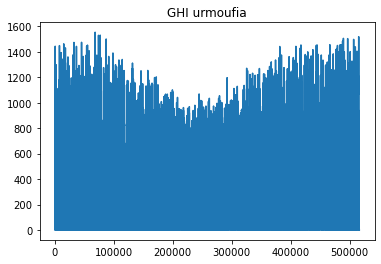

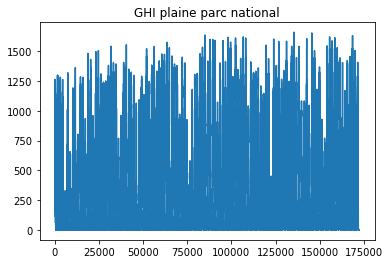

In [121]:
data = solar.getData(sites=['urmoufia','plaineparcnational'], sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')

plt.figure()
plt.plot(data['urmoufia']["GHI_pn03_Avg"]["values"])
plt.title(label="GHI urmoufia")
pt=plt.show()
plt.plot(data['plaineparcnational']["GHI_pb01_Avg"]["values"])
plt.title(label="GHI plaine parc national")
pt=plt.show()


DEBUG:pysolardb.SolarDB:Data successfully recovered


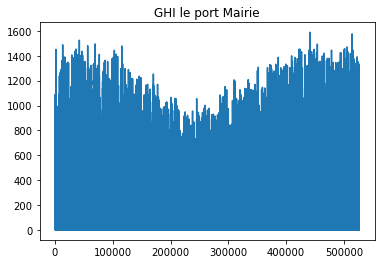

In [132]:
data = solar.getData(sites=['leportmairie','edflapossession','edfsaintleu','edfboisdenefles','edfsaintpierre','edfsaintandre','saintlouisjeanjoly'], sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')
plt.plot(data['leportmairie']["GHI_pd01_Avg"]["values"])
plt.title(label="GHI le port Mairie")
pt=plt.show()

DEBUG:pysolardb.SolarDB:Data successfully recovered


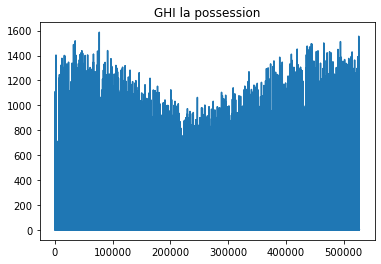

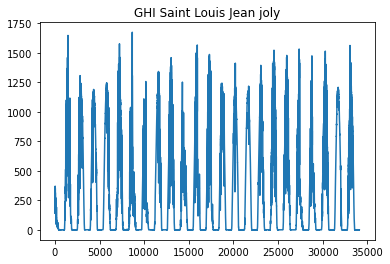

In [135]:
data = solar.getData(sites=['edflapossession','saintlouisjeanjoly'], sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')

plt.plot(data['edflapossession']['GHI_pk01_Avg']["values"])
plt.title(label="GHI la possession")
pt=plt.show()
plt.plot(data['saintlouisjeanjoly']["GHI_pr01_Avg"]["values"])
plt.title(label="GHI Saint Louis Jean joly")
pt=plt.show()

DEBUG:pysolardb.SolarDB:Data successfully recovered


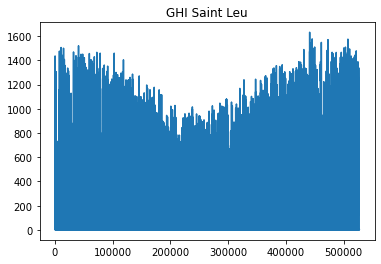

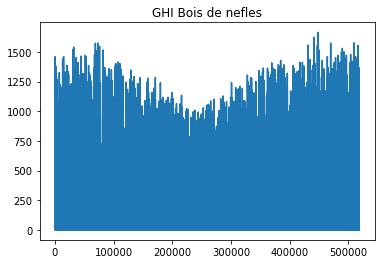

In [133]:
data = solar.getData(sites=['edfsaintleu','edfboisdenefles'], sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')

plt.plot(data['edfsaintleu']['GHI_ph01_Avg']["values"])
plt.title(label="GHI Saint Leu")
pt=plt.show()
plt.plot(data['edfboisdenefles']['GHI_pj01_Avg']["values"])
plt.title(label="GHI Bois de nefles")
pt=plt.show()


DEBUG:pysolardb.SolarDB:Data successfully recovered


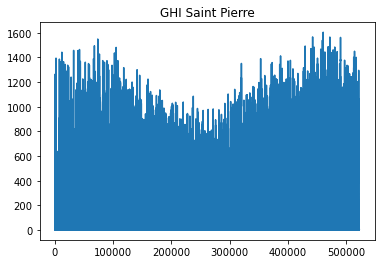

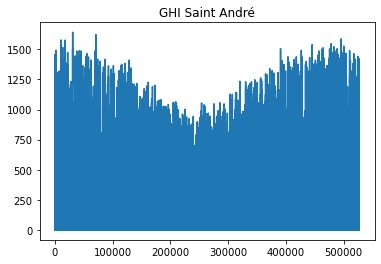

In [134]:
data = solar.getData(sites=['edfsaintpierre','edfsaintandre'], sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')

plt.plot(data['edfsaintpierre']['GHI_pi01_Avg']["values"])
plt.title(label="GHI Saint Pierre")
pt=plt.show()
plt.plot(data['edfsaintandre']['GHI_pl01_Avg']["values"])
plt.title(label="GHI Saint André")
pt=plt.show()

In [137]:
# data = solar.getData(sites=['urmoufia','plaineparcnational','leportmairie','edflapossession','edfsaintleu','edfboisdenefles','edfsaintpierre','edfsaintandre','saintlouisjeanjoly'], sensor_types=["GHI"], start='2020-01-01', stop='2021-01-01')

# plt.figure()
# plt.plot(data['urmoufia']["GHI_pn03_Avg"]["values"])
# plt.title(label="GHI urmoufia")
# # pt=plt.show()
# plt.plot(data['plaineparcnational']["GHI_pb01_Avg"]["values"])
# plt.title(label="GHI plaine parc national")
# # pt=plt.show()
# plt.plot(data['leportmairie']["GHI_pd01_Avg"]["values"])
# plt.title(label="GHI le port Mairie")
# # pt=plt.show()
# plt.plot(data['edflapossession']['GHI_pk01_Avg']["values"])
# plt.title(label="GHI la possession")
# # pt=plt.show()
# plt.plot(data['saintlouisjeanjoly']["GHI_pr01_Avg"]["values"])
# plt.title(label="GHI Saint Louis Jean joly")
# # pt=plt.show()
# plt.plot(data['edfsaintleu']['GHI_ph01_Avg']["values"])
# plt.title(label="GHI Saint Leu")
# # pt=plt.show()
# plt.plot(data['edfboisdenefles']['GHI_pj01_Avg']["values"])
# plt.title(label="GHI Bois de nefles")
# # pt=plt.show()
# plt.plot(data['edfsaintpierre']['GHI_pi01_Avg']["values"])
# plt.title(label="GHI Saint Pierre")
# # pt=plt.show()
# plt.plot(data['edfsaintandre']['GHI_pl01_Avg']["values"])
# plt.title(label="GHI Saint André")
# pt=plt.show()
